<a href="https://colab.research.google.com/github/NeemaNdanu/Natural-language-processing/blob/main/NLP_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis on a Social Media Dataset**

**Objective: Perform sentiment analysis on a social media dataset (e.g., HateSpeech on Twitter data) and interpret the results.**

**Instructions:**

**1. Collect or use the assigned HateSpeechKe dataset (Find Attached. Please DO NOT DISTRIBUTE the file)**

**2. Preprocess the data by removing noise (URLs, special characters, etc.) and perform tokenization.**

In [ ]:
# Load the necessary libraries
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK data files
nltk.download('vader_lexicon')
nltk.download('punkt')

# Load the data
path="/content/Wote12024NLP.csv"
df = pd.read_csv(path, sep=",", encoding='latin-1')
df.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweet
0,";2017-10-18 11:04;0;0;""That #ShangweVedio shou..."
1,";2017-10-18 09:15;0;1;""they wrote letters to i..."
2,";2017-10-18 09:06;0;2;""Akombe was a nasa mole ..."
3,";2017-10-04 12:24;0;0;""@paulinenjoroge @OleItu..."
4,";2017-09-25 20:20;0;0;""#akombemustgo"";;;#akomb..."


In [ ]:
# Preprocess the text in the 'tweet' column
def preprocess_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|URL', '', text)
        # Remove special characters, punctuation, and numbers, keeping hashtags (#)
        text = re.sub(r'[^a-zA-Z\s#]', '', text)
        # Tokenize and rejoin the text
        tokens = word_tokenize(text.lower())
        return ' '.join(tokens)
    else:
        # Return empty string for non-string values
        return ''

# Apply the preprocessing to the 'tweet' column
df['cleaned_text'] = df['tweet'].apply(preprocess_text)

# Use only 'cleaned_text' for analysis
df = df[['cleaned_text']]

# Verify the cleaning process
print("Sample of cleaned text data:")
print(df)

Sample of cleaned text data:
                                             cleaned_text
0       that # shangwevedio should be replaced where d...
1       they wrote letters to iebc their bloggers tren...
2       akombe was a nasa mole jubilee never wanted hi...
3       paulinenjoroge oleitumbi jubileepartyk teamuhu...
4                           # akombemustgo # akombemustgo
...                                                   ...
155231  haha this hashtag is tribal out of kenyan trib...
155232  kikuyus dont even love this man are you ready ...
155233  me i have lived with kikuyus all my life and t...
155234  when other tribes are saying that we will have...
155235  the past few days i have been thinking of my d...

[155236 rows x 1 columns]


**3. Use a library (e.g., NLTK VADER or a pre-trained sentiment model) to analyze sentiment.**

In [ ]:
# Load necessary libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from pickle import DEFAULT_PROTOCOL

# Download NLTK data files
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to categorize sentiment based on the compound score
def get_sentiment_category(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis to each cleaned tweet
df['sentiment_scores'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x))

# Extract compound score and categorize sentiment
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['sentiment'] = df['compound_score'].apply(get_sentiment_category)

# View a sample of the results
df[['cleaned_text', 'sentiment_scores', 'sentiment']]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,cleaned_text,sentiment_scores,sentiment
0,that # shangwevedio should be replaced where d...,"{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compou...",negative
1,they wrote letters to iebc their bloggers tren...,"{'neg': 0.163, 'neu': 0.837, 'pos': 0.0, 'comp...",negative
2,akombe was a nasa mole jubilee never wanted hi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
3,paulinenjoroge oleitumbi jubileepartyk teamuhu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
4,# akombemustgo # akombemustgo,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
...,...,...,...
155231,haha this hashtag is tribal out of kenyan trib...,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",positive
155232,kikuyus dont even love this man are you ready ...,"{'neg': 0.29, 'neu': 0.624, 'pos': 0.087, 'com...",negative
155233,me i have lived with kikuyus all my life and t...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",positive
155234,when other tribes are saying that we will have...,"{'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'comp...",negative


**EXPLANATION**

The sentiment_scores column contains a dictionary with four keys: **'neg'**, **'neu'**, **'pos'**, and **'compound'**. This is typical of VADER's output, where:

*   **'neg'** represents the probability of the text being negative,
*   **'neu'** represents the probability of the text being neutral,
*   **'pos'** represents the probability of the text being positive,
*   **'compound'** represents an overall score calculated by combining these probabilities to provide an overall sentiment measure. It ranges from -1 (most negative) to +1 (most positive).

**4. Calculate sentiment distribution across positive, negative, and neutral sentiments.**

Sentiment Distribution (%):
sentiment
neutral     36.092144
negative    34.752248
positive    29.155608
Name: proportion, dtype: float64


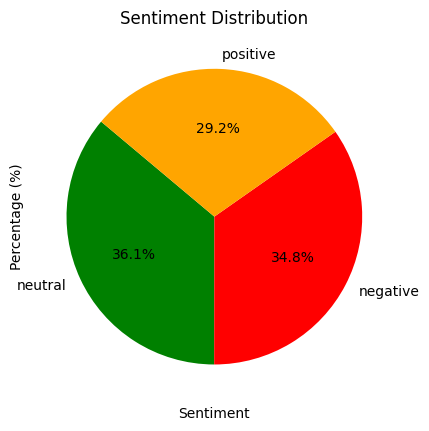

In [ ]:
# Load the necessray libraries
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment category
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100
print("Sentiment Distribution (%):")
print(sentiment_counts)

# Plot the sentiment distribution
sentiment_counts.plot(kind='pie', colors=['green','red','orange'], autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Percentage (%)")
plt.show()


**5. Interpret the results by discussing trends, patterns, and potential biases.**

The following are some of the finidigs:-

**1. Trends**

* **Overall Sentiment Distribution:** The majority of tweets in the dataset show a neutral sentiment, followed by negative, and finally positive sentiments. This suggests that users tend to express opinions that are either balanced or non-committal, with fewer expressing clear positivity.

* **Sentiment Differences:**

  * The gap between neutral and negative sentiments is **1.34%.**
  * The difference between negative and positive sentiments is **5.60%.**
  * The largest gap, between neutral and positive, stands at **6.94%.**

These differences highlight a consistent trend where neutrality is most common, while positivity is the least expressed sentiment.

**2. Patterns**

* **Neutral Dominance:** The prevalence of neutral sentiments suggests that users may use the platform mainly for informational purposes or general observations rather than sharing strong opinions. This reflects a trend of social media serving as a space for updates or commentary without a strong emotional tone.

**Negative Sentiments over Positive:** The slight prevalence of negative sentiments over positive ones indicates that users may be more inclined to express criticism or raise concerns than to offer praise. This trend is reflected in the hashtag **#AkombeMustGo**, showing strong public dissatisfaction with politician Akombe and an overall tendency toward criticism rather than commendation.

**3. Biases**

* **Event-Driven Bias:** The **#AkombeMustGo** hashtag reflects a concentrated wave of public sentiment against politician Akombe, which may lead to an overrepresentation of negative sentiments. This focus on one political figure could overshadow other sentiments that might otherwise appear in the dataset.

**4. Insights**

* **Reflection of Political Climate:** The dataset captures a specific moment in public opinion, characterized by dissatisfaction with political leadership. This suggests that citizens may feel disconnected or at odds with certain leaders, using social platforms to voice concerns in real-time.

**Conclusion:**

The analysis provides valuable insights into public opinion on political accountability and governance in Kenya, especially through the **#AkombeMustGo** hashtag, which highlights a public call for political change. Government officials and policymakers can use this information to understand public concerns and grievances better. By addressing these issues, they can improve communication and engage more effectively with citizens, helping to build trust and respond proactively to public sentiment.

